### Data Preprocessing & ready the  datset

In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import os

# Specify the path to your dataset using an absolute path
data_train_path = os.path.abspath("C:\\Users\\bariu\\Python\\Image_Classification\\Fruits_Vegetables\\train")
data_test_path = os.path.abspath("C:\\Users\\bariu\\Python\\Image_Classification\\Fruits_Vegetables\\test")
data_val_path = os.path.abspath("C:\\Users\\bariu\\Python\\Image_Classification\\Fruits_Vegetables\\validation")


In [11]:
# data_train_path = 'Python/Image_Classification/Fruits_Vegetables/train'
# data_train_test ='Python/Image_Classification/Fruits_Vegetables/test'
# data_train_val = 'Python/Image_Classification/Fruits_Vegetables/validation'

#### set our images in similar size(fixed width & fixed height

In [32]:
img_width = 180 
img_height = 180

##### The tf.keras.utils.image_dataset_from_directory function is a convenient way to load image data from a directory structure and convert it into a TensorFlow dataset, which can be used for training machine learning models. This function handles various aspects such as reading images, resizing, shuffling, and batching, making it suitable for image classification tasks.

In [33]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


#### Show class_Name by this function and keep that function in a variable for later use

In [34]:
data_cat=data_train.class_names

In [70]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [35]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height, img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [36]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                       image_size=(img_height, img_width),
                                                       shuffle=False,
                                                       batch_size=32,
                                                       validation_split=False)

Found 359 files belonging to 36 classes.


#### Let's print some images from training dataset

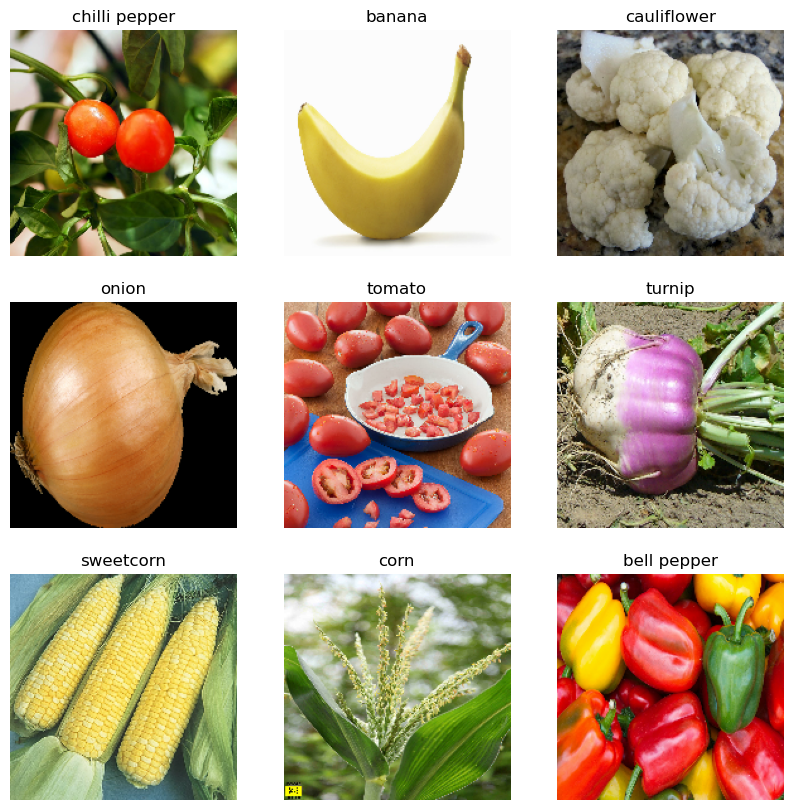

In [38]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

#### model creation

## create layers within model

In [39]:
from tensorflow.keras.models import Sequential 

In [40]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [43]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
])

## already model has been created now model compiling 

In [44]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [45]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 [==============================] - 97s 963ms/step - loss: 3.4964 - accuracy: 0.0732 - val_loss: 2.7029 - val_accuracy: 0.2450
Epoch 2/25
98/98 [==============================] - 84s 839ms/step - loss: 2.5092 - accuracy: 0.2661 - val_loss: 1.6683 - val_accuracy: 0.5271
Epoch 3/25
98/98 [==============================] - 89s 881ms/step - loss: 1.9898 - accuracy: 0.4305 - val_loss: 1.2303 - val_accuracy: 0.6866
Epoch 4/25
98/98 [==============================] - 97s 961ms/step - loss: 1.4932 - accuracy: 0.5766 - val_loss: 0.8851 - val_accuracy: 0.7778
Epoch 5/25
98/98 [==============================] - 95s 944ms/step - loss: 0.9778 - accuracy: 0.7194 - val_loss: 0.4841 - val_accuracy: 0.8917
Epoch 6/25
98/98 [==============================] - 99s 978ms/step - loss: 0.5625 - accuracy: 0.8356 - val_loss: 0.5197 - val_accuracy: 0.9316
Epoch 7/25
98/98 [==============================] - 94s 936ms/step - loss: 0.3962 - accuracy: 0.8918 - val_loss: 0.4396 - val_accuracy: 0.9316

Text(0.5, 1.0, 'Loss')

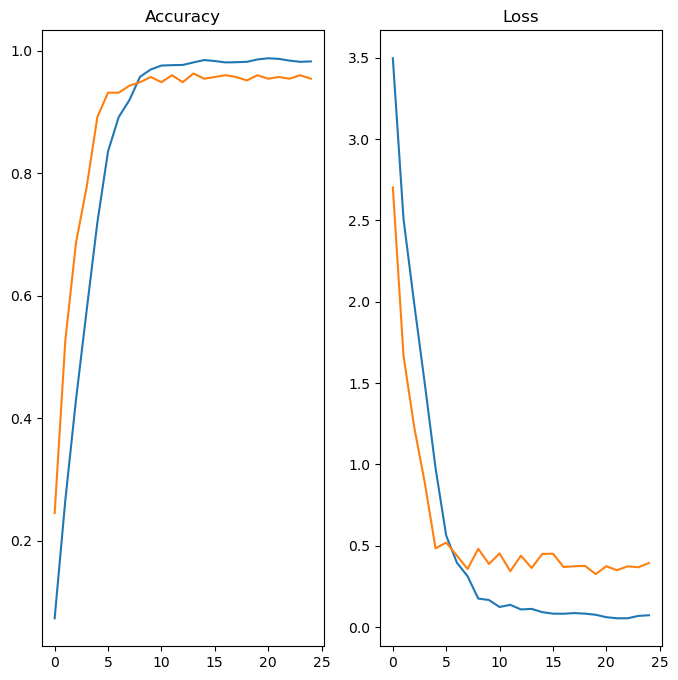

In [47]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'], label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

## Now let's print the summary of the model

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

# Predictiong Value from model

In [75]:
image = "C:\\Users\\bariu\\Python\\Image_Classification\\banana.jpg"
image = tf.keras.utils.load_img(image,target_size= (img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [76]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 39ms/step


In [77]:
score = tf.nn.softmax(predict)

In [78]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}' .format(data_cat[np.argmax(score)],np.max(score)*100)) 

Veg/Fruit in image is banana with accuracy of 86.79


In [69]:
model.save('Image_classify.keras') 